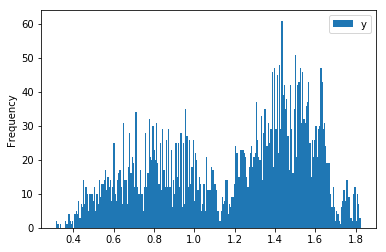

In [14]:
df.plot(kind='hist',bins=250,subplots=True)
plt.show()

In [37]:
#Making a Prediction
#　Create the First Model
from fbprophet import Prophet
model = Prophet(weekly_seasonality=True)
model.fit(df)

In [38]:
#1years = 200days 
future_df = model.make_future_dataframe(200*3)

future_df.tail()

,ds
5097,2019-04-20
5098,2019-04-21
5099,2019-04-22
5100,2019-04-23
5101,2019-04-24


In [39]:
#add columns yhat_lower,yhat_upper
forecast_df = model.predict(future_df)
forecast_df[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5097,2019-04-20,0.575572,0.284987,0.862385
5098,2019-04-21,0.576060,0.275110,0.843941
5099,2019-04-22,0.570618,0.250860,0.836056
5100,2019-04-23,0.569489,0.268054,0.845028
5101,2019-04-24,0.570232,0.269105,0.833248


In [40]:
np.exp(forecast_df[['yhat','yhat_lower','yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
5097,1.778147,1.329745,2.368803
5098,1.779015,1.316676,2.325513
5099,1.769359,1.285131,2.307250
5100,1.767363,1.307417,2.328043
5101,1.768678,1.308792,2.300779


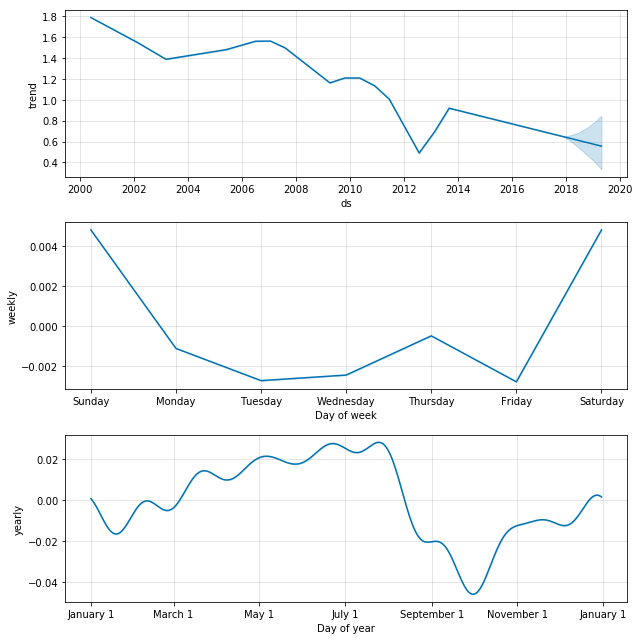

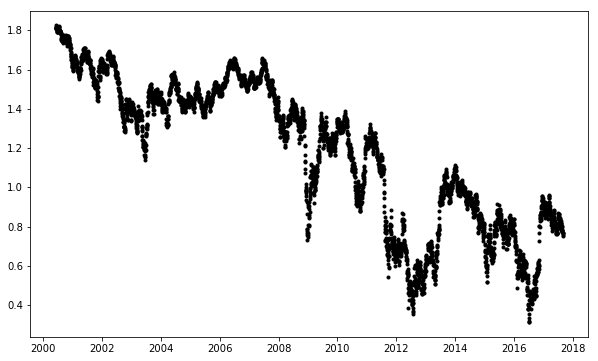

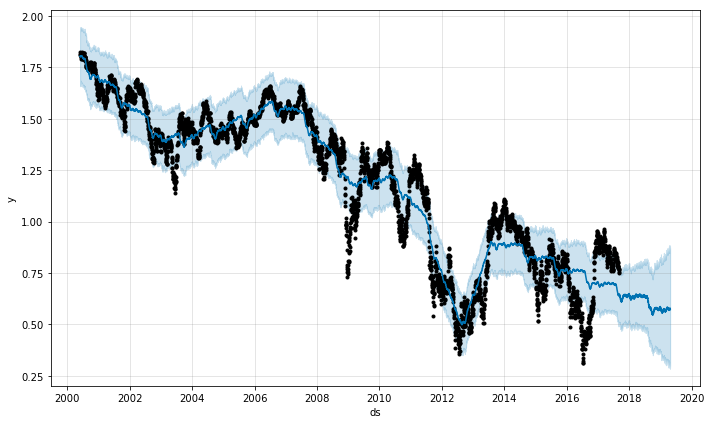

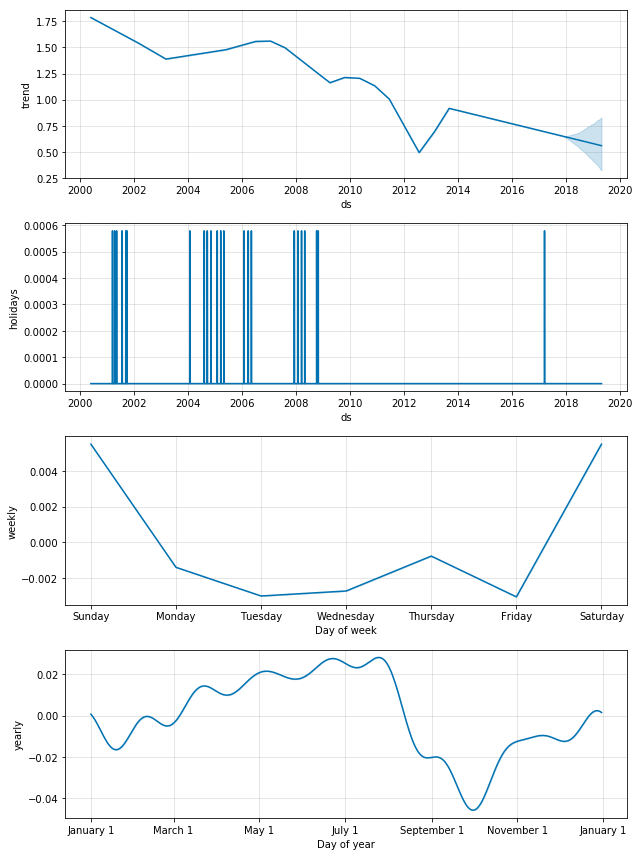

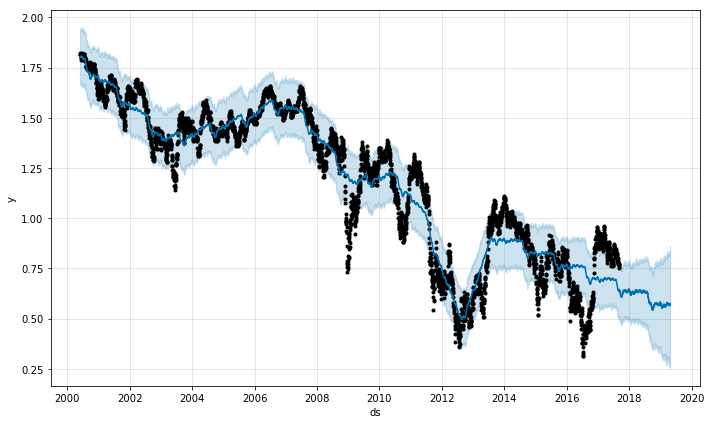

In [41]:
model.plot(forecast_df)

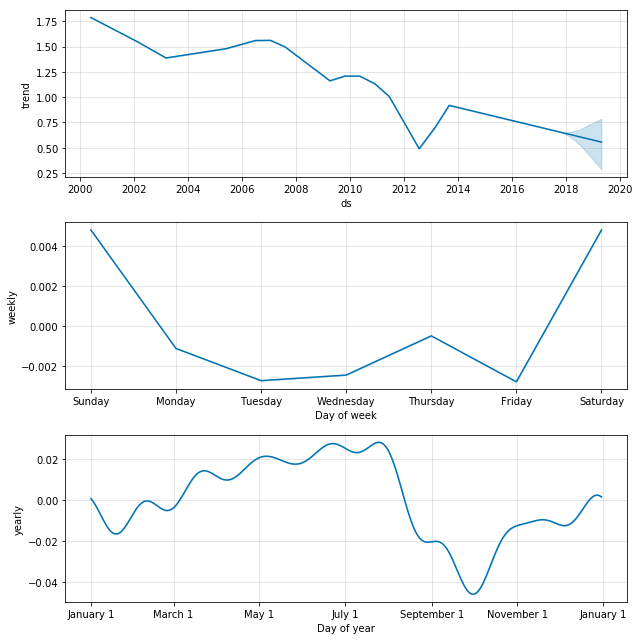

In [42]:
model.plot_components(forecast_df)

In [43]:
event = pd.read_csv('event.csv')

In [44]:
model2 = Prophet(holidays=event).fit(df)

In [45]:
forecast_df2 = model2.make_future_dataframe(periods=200*3)
forecast_df2 = model2.predict(forecast_df2)

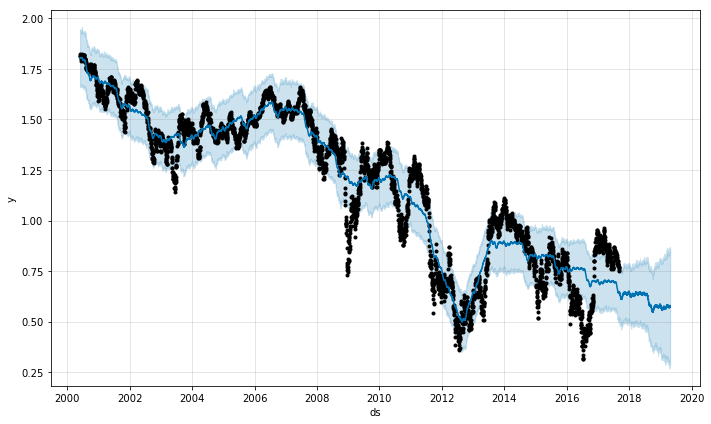

In [46]:
model2.plot(forecast_df2)

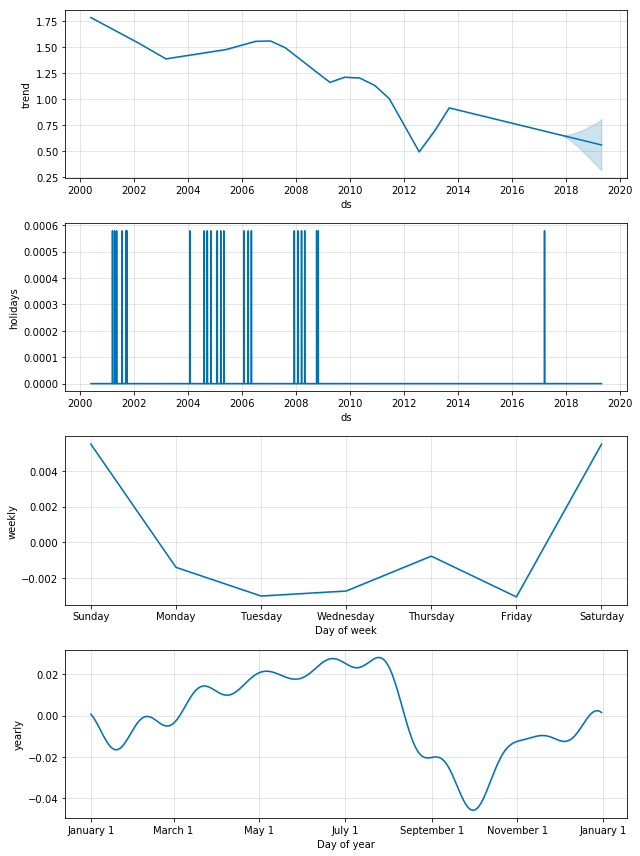

In [47]:
model2.plot_components(forecast_df2)